## Mitsiu Alejandro Carreño Sarabia -E23S-18014

### Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

* Compute the Fourier Transform of a rectangular window given on N points. The result is called a (discrete) cardinal sine (or sometimes Dirichlet kernel). Sketch a plot, and study the behaviour of this function with N.

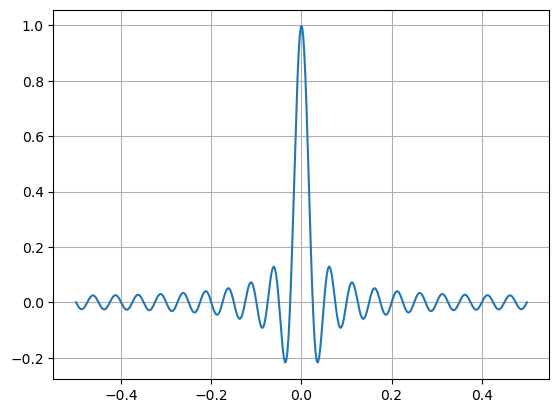

In [2]:
def dirichletKernel(x, N):
    if isinstance(x, (int, float)): 
        x = [x]
    x = np.array(x)
    
    out = np.ones(np.shape(x))
    I = np.where(x != 0)
    out[I] = np.sin(x[I]) / (N * np.sin(x[I] / N))
    return out
    

N = 40
f = np.linspace(-0.5,0.5,400)
kernel = dirichletKernel(np.pi * N * f, N)
plt.plot(f, kernel)
plt.grid(True)

* Experiment numerically...

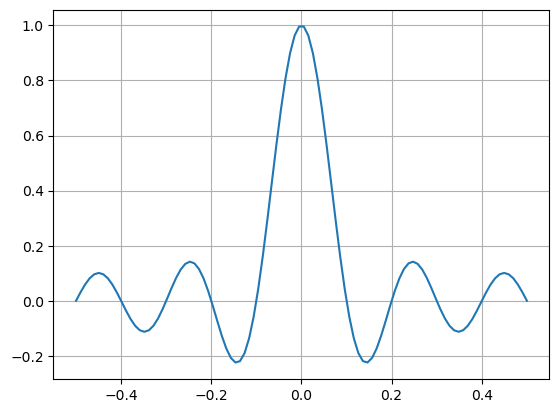

In [3]:
N = 10
f = np.linspace(-0.5,0.5,100)
kernel = dirichletKernel(np.pi * N * f, N)
plt.plot(f, kernel)
plt.grid(True)

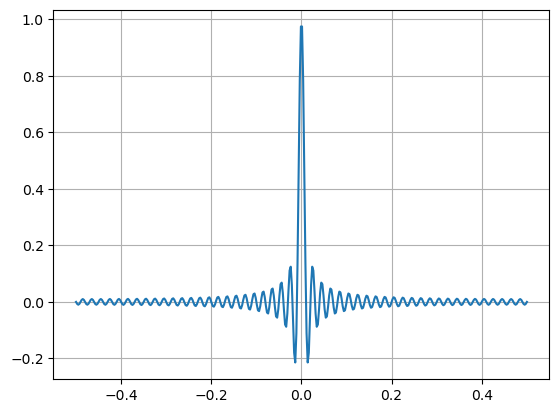

In [4]:
N = 100
f = np.linspace(-0.5,0.5,400)
kernel = dirichletKernel(np.pi * N * f, N)
plt.plot(f, kernel)
plt.grid(True)

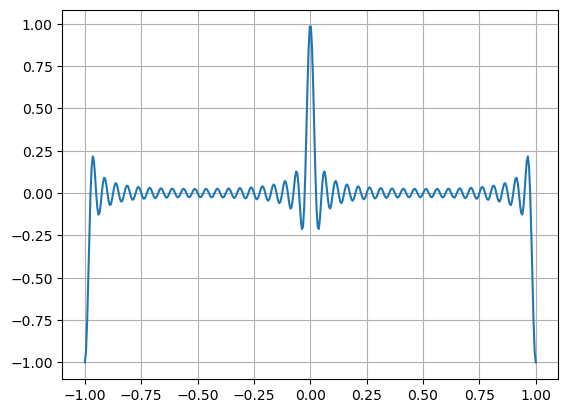

In [5]:
N = 40
f = np.linspace(-1,1,400)
kernel = dirichletKernel(np.pi * N * f, N)
plt.plot(f, kernel)
plt.grid(True)

* Compute the Fourier transform of a sine wave $sin(2pif_0n)$ given on N points.

In [6]:
import numpy as np

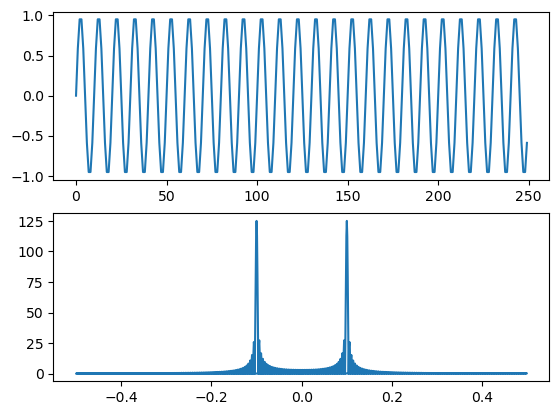

In [7]:
N = 250
f0 = 0.1
NN = 1000

fig, ax = plt.subplots(2,1)

def plot_sin_and_transform(N, f0, ax):
    t = np.arange(N)
    s = np.sin(2 * np.pi * f0 * t)
    Sf = np.fft.fft(s, NN)
    ax[0].plot(t,s)
    f = np.fft.fftfreq(NN)
    ax[1].plot(f, np.abs(Sf))
    #plt.show()

plot_sin_and_transform(N, f0, ax)

* Examine what happens when the N and $f_0$ vary

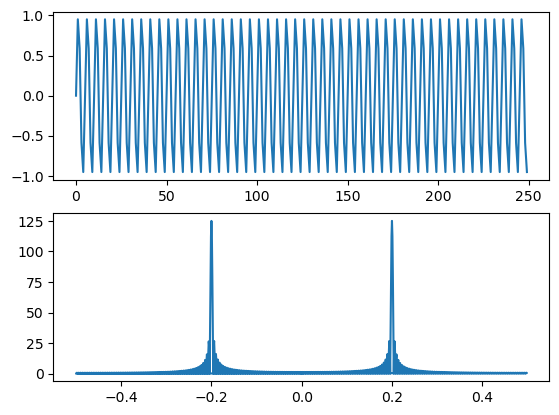

In [8]:
N = 250
f0 = 0.2
NN = 1000

fig, ax = plt.subplots(2,1)
plot_sin_and_transform(N, f0, ax)

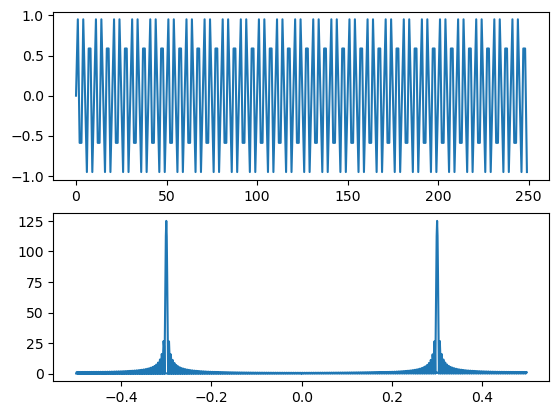

In [9]:
N = 250
f0 = 0.3
NN = 1000

fig, ax = plt.subplots(2,1)
plot_sin_and_transform(N, f0, ax)

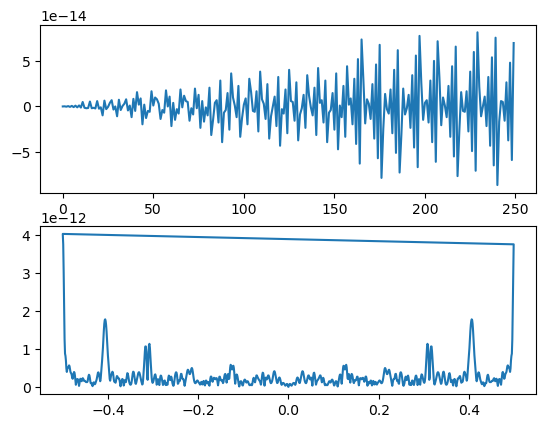

In [10]:
N = 250
f0 = 0.5
NN = 1000

fig, ax = plt.subplots(2,1)
plot_sin_and_transform(N, f0, ax)

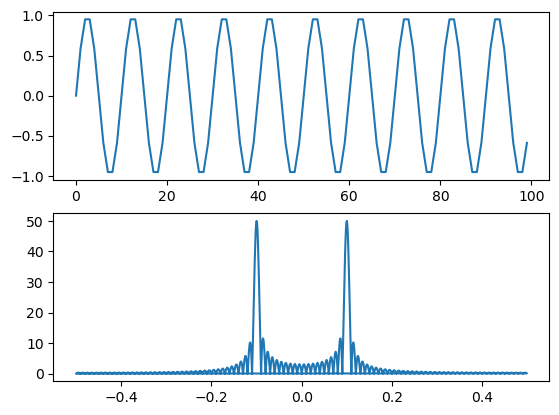

In [11]:
N = 100
f0 = 0.1
NN = 1000

fig, ax = plt.subplots(2,1)
plot_sin_and_transform(N, f0, ax)

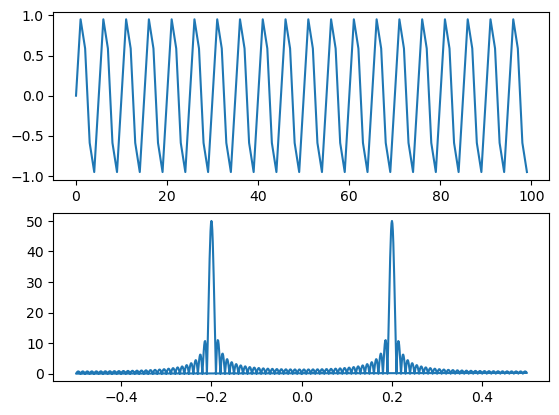

In [12]:
N = 100
f0 = 0.2
NN = 1000

fig, ax = plt.subplots(2,1)
plot_sin_and_transform(N, f0, ax)

### Part 2
* Compute by hand the convolution between two rectangular signals



A = [1,2,3,4,5] y B = [5,4,3,2,1]        
Invertimos A        
A = [5,4,3,2,1]       

| B | 5 | 4 | 3 | 2 | 1 | Operación                        |
|---|---|---|---|---|---|----------------------------------|
|   | 1 |   |   |   |   | 5x1 = 5                          |
|   | 2 | 1 |   |   |   | 5x2 + 4x1 = 14                   |
|   | 3 | 2 | 1 |   |   | 5x3 + 4x2 + 3x1 = 26             |
|   | 4 | 3 | 2 | 1 |   | 5x4 + 4x3 + 3x2 + 2x1 = 40       |
|   | 5 | 4 | 3 | 2 | 1 | 5x5 + 4x4 + 3x3 + 2x2 + 1x1 = 55 |
|   |   | 5 | 4 | 3 | 2 | 4x5 + 3x4 + 2x3 + 1x2 = 40       |
|   |   |   | 5 | 4 | 3 | 3x5 + 2x4 + 1x3 = 26             |
|   |   |   |   | 5 | 4 | 2x5 + 1x4 = 14                   |
|   |   |   |   |   | 5 | 1x5 = 5                          |
|   |   |   |   |   |   |                                  |

A*B = [5, 14, 26, 40, 55, 40, 26, 14, 5]

* Propose a python program that computes the result, given two arrays
```
def myconv(x, y):
    return z
```

In [13]:
def myconv(x, y):
    L = np.size(x)
    assert np.size(x) == np.size(y), "The two signals must have the same lengths"
    
    z_len = 2 * L -1
    z = np.zeros(z_len)
    
    
    for i in np.arange(0,z_len):
        z[i] = np.sum(x[0 if i < L else i + 1 - L :i+1] * y[-(i+1):z_len-i])
        '''
        Given arrays of 5 
        print(x[0:1]) 
        print(x[0:2]) 
        print(x[0:3]) 
        print(x[0:4]) 
        print(x[0:5]) 
        print(x[1:6]) 
        print(x[2:7]) 
        print(x[3:8])
        print(x[4:9])
    
        print(y[-1:9])
        print(y[-2:8])
        print(y[-3:7])
        print(y[-4:6])
        print(y[-5:5])
        print(y[-6:4])
        print(y[-7:3])
        print(y[-8:2])
        print(y[-9:1])
        '''
    return z
z = myconv(np.array([1,1,1,1,1]), np.array([1,1,1,1,1]))
#z = myconv(np.array([1,2,3,4,5]), np.array([5,4,3,2,1]))
print(z)

[1. 2. 3. 4. 5. 4. 3. 2. 1.]


* Of course, convolution functions have already be implemented, in many languages, by many people and using many algorithms. Implementations also exists in two or more dimensions. So, we do need to reinven the wheel. Consult the help of np.convolve and of sig.convolve (respectively from numpy and scipy modules)

In [14]:
import scipy as sy

conv = sy.signal.convolve(np.array([1,2,3,4,5]), np.array([5,4,3,2,1]))
print(conv)

[ 5 14 26 40 55 40 26 14  5]


In [15]:
np.convolve([1, 2, 3, 4, 5], [5, 4, 3, 2, 1])

array([ 5, 14, 26, 40, 55, 40, 26, 14,  5])

In [16]:
np.convolve([5,4,3,2,1], [1,2,3,4,5])

array([ 5, 14, 26, 40, 55, 40, 26, 14,  5])

* Use this convolution to compute and display the convolution between two rectangular signals

/tmp/ipykernel_6811/4228106406.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


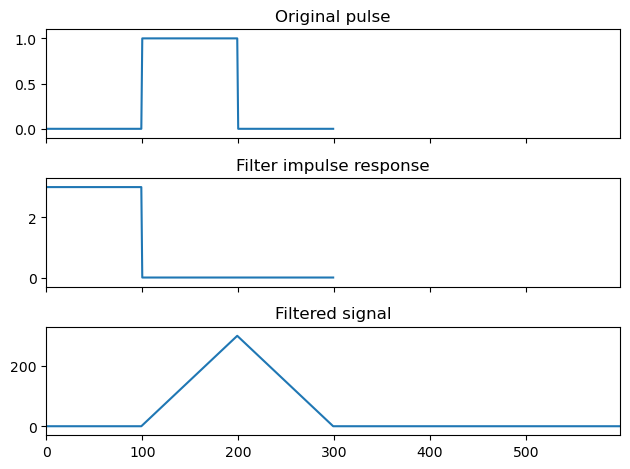

In [17]:
rec1 = np.repeat([0., 1., 0.], 100)
rec2 = np.repeat([3, 0, 0.], 100)
conv = np.convolve(rec1, rec2)


fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(rec1)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(rec2)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(np.convolve(rec1, rec2))
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()